In [25]:
import sqlutil as sqlutil 
import matplotlib.pyplot as plt
import numpy as np

#plotting the motion of one lens.
lensRa, lensDec, id,pmra,pmdec = sqlutil.get('select ra, dec, source_id,pmra,pmdec from gaia_dr1.tgas_source where source_id=1866721120465481728',
                       db='wsdb',host='cappc127.ast.cam.ac.uk', user='peter_mcgill', password='Ln3g.wsk')



In [50]:
xvalues = []
yvalues = []

ra = lensRa
dec = lensDec

for i in np.linspace(0,0.01,num=20):
    ra_new = ra + i*pmra
    dec_new = dec + i*pmdec 
    xvalues.append(dec_new * np.cos(ra_new))
    yvalues.append(ra_new)
    


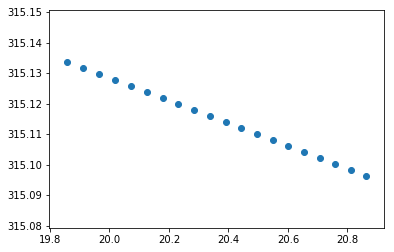

In [51]:
plt.scatter(xvalues,yvalues)
plt.show()
